## Mask detection
***
#### **Name:** Foysal Ahamed Nirob
#### **Id:** 19-40925-2
#### **Section:** CVPR [C]

In [31]:
import os
import random
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


In [5]:
with_mask_dir = '/content/drive/MyDrive/Data/dataset/with_mask'
without_mask_dir = '/content/drive/MyDrive/Data/dataset/without_mask'

def load_and_preprocess_data(image_dir, target_size=(227, 227)):
    images = []
    labels = []
    for label, dir_name in enumerate([with_mask_dir, without_mask_dir]):
        for img_filename in os.listdir(dir_name):
            img_path = os.path.join(dir_name, img_filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, target_size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

X, Y = load_and_preprocess_data(with_mask_dir, target_size=(227, 227))


In [60]:
def count_images_in_folder(folder_path):
    num_images = len([file for file in os.listdir(folder_path) if file.endswith('.jpg') or file.endswith('.png') or file.endswith('.jpeg')])
    return num_images

num_train_images = count_images_in_folder(with_mask_dir)
num_test_images = count_images_in_folder(without_mask_dir)

print(f"Number of images in with mask folder: {num_train_images}")
print(f"Number of images in without mask: {num_test_images}")


Number of images in with mask folder: 2156
Number of images in without mask: 1930


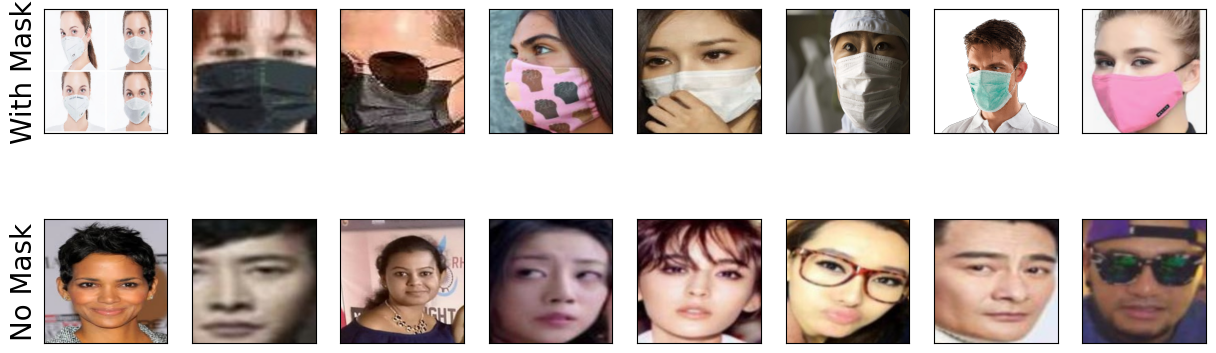

In [41]:
num_images = 8

random_with_mask_files = random.sample(os.listdir(with_mask_dir), num_images)
random_without_mask_files = random.sample(os.listdir(without_mask_dir), num_images)

plt.figure(figsize=(15, 5))
i = 0
for c in ["With Mask", "No Mask"]:
    path = with_mask_dir if c == "With Mask" else without_mask_dir
    image_files = random_with_mask_files if c == "With Mask" else random_without_mask_files
    for img in image_files:
        plt.subplot(2, num_images, i + 1)
        img_arr = plt.imread(os.path.join(path, img))
        img_arr = cv2.resize(img_arr, (227, 227))
        plt.imshow(img_arr)
        if i % num_images == 0:
            plt.ylabel(c, size=20)
        plt.xticks([])
        plt.yticks([])
        i += 1

plt.show()

In [42]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)

In [43]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [47]:
# Build the model with more convolutional layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(1024, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 225, 225, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 55, 55, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 26, 26, 128)     

In [50]:
batch_size = 128
epochs = 20

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    validation_data=(X_val, Y_val),
                    epochs=epochs,
                    callbacks=[early_stopping],
                    verbose=1)



Epoch 1/20
14/14 [==============================] - 21s 1s/step - loss: 0.0303 - accuracy: 0.9948 - val_loss: 2.7704 - val_accuracy: 0.9954
Epoch 2/20
14/14 [==============================] - 24s 2s/step - loss: 0.0275 - accuracy: 0.9948 - val_loss: 3.4278 - val_accuracy: 0.9954
Epoch 3/20
14/14 [==============================] - 20s 1s/step - loss: 0.0299 - accuracy: 0.9948 - val_loss: 5.3095 - val_accuracy: 0.9954
Epoch 4/20
14/14 [==============================] - 22s 2s/step - loss: 0.0258 - accuracy: 0.9948 - val_loss: 3.6274 - val_accuracy: 0.9954
Epoch 5/20
14/14 [==============================] - 20s 1s/step - loss: 0.0434 - accuracy: 0.9948 - val_loss: 2.2986 - val_accuracy: 0.9954
Epoch 6/20
14/14 [==============================] - 22s 2s/step - loss: 0.0292 - accuracy: 0.9948 - val_loss: 1.5615 - val_accuracy: 0.9954
Epoch 7/20
14/14 [==============================] - 21s 1s/step - loss: 0.0260 - accuracy: 0.9948 - val_loss: 0.6897 - val_accuracy: 0.9954
Epoch 8/20
14/14 [==

<ipython-input-59-12ddec12ad22>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


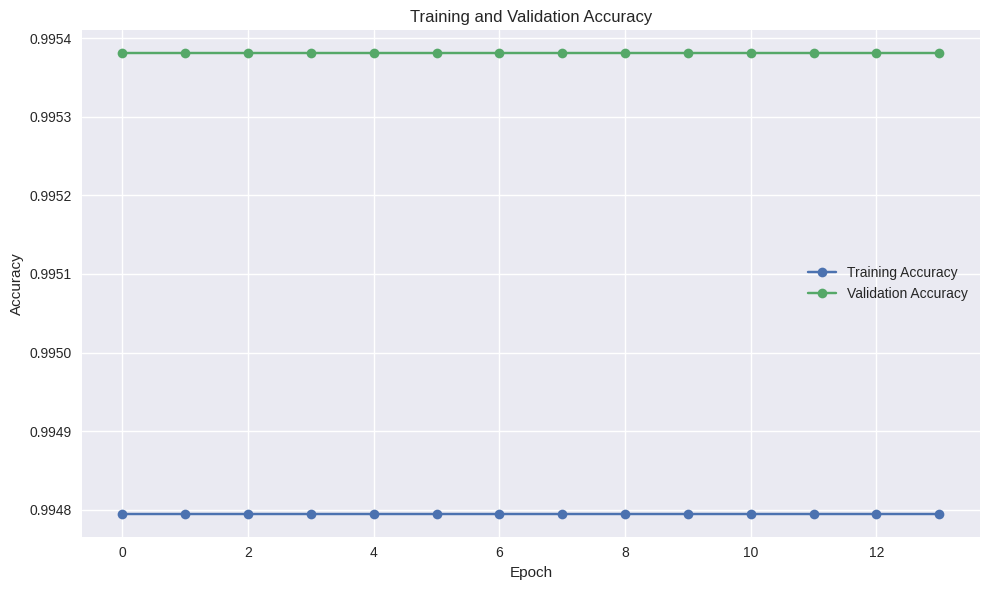

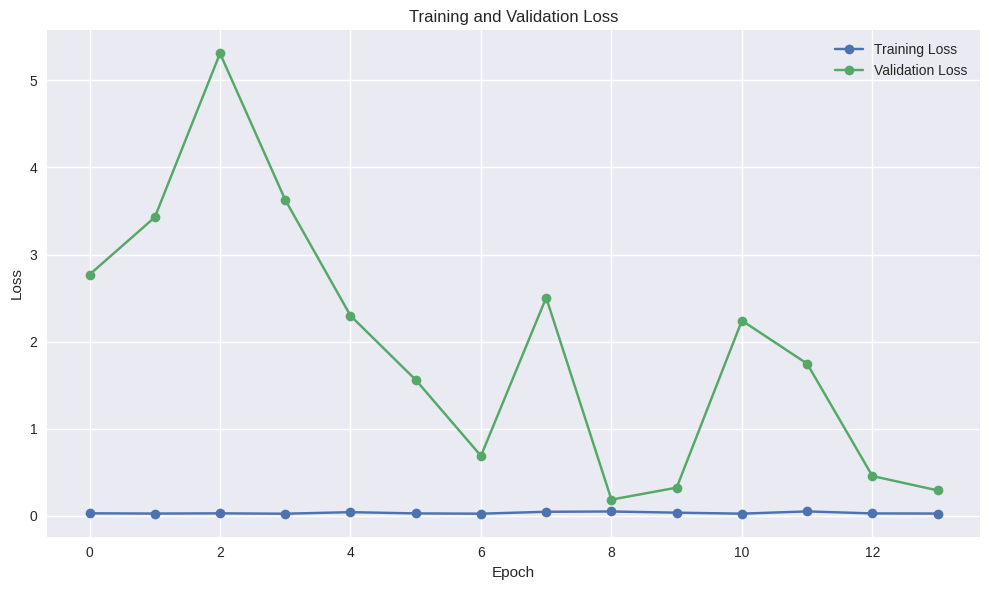

In [59]:
# Set style for plots
plt.style.use('seaborn')

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
from sklearn.metrics import f1_score, confusion_matrix

# After model.fit()
predictions = model.predict(X_val)
predicted_classes = np.argmax(predictions, axis=1)

f1 = f1_score(Y_val, predicted_classes)
conf_matrix = confusion_matrix(Y_val, predicted_classes)

print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

14/14 [==============================] - 1s 24ms/step
F1 Score: 0.0
Confusion Matrix:
[[431   0]
 [  2   0]]


In [51]:
model.save('mask_detection_model.h5')

In [58]:
# import cv2
# from IPython.display import display, clear_output
# import numpy as np


# def show_camera():
#     camera = cv2.VideoCapture(0)

#     while True:
#         ret, frame = camera.read()
#         if not ret:
#             break

#         label, confidence = detect_mask(frame)

#         cv2.putText(frame, f"{label} ({confidence:.2f})", (10, 30),
#                     cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

#         frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

#         clear_output(wait=True)
#         display(frame_rgb)

#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break

#     camera.release()
#     cv2.destroyAllWindows()

# show_camera()

# #not working!!!


In [62]:
model = tf.keras.models.load_model('mask_detection_model.h5')

In [67]:
import cv2
import numpy as np

def preprocess_image(image_path, target_size=(227, 227)):
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0
    return img

image_path = '/content/drive/MyDrive/Data/pic3.jpg'
input_image = preprocess_image(image_path)


In [68]:
input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension
predictions = model.predict(input_image)
predicted_class = np.argmax(predictions)
confidence = predictions[0][predicted_class]

label = 'With Mask' if predicted_class == 0 else 'Without Mask'
print(f"Prediction: {label}, Confidence: {confidence:.2f}")


1/1 [==============================] - 0s 18ms/step
Prediction: With Mask, Confidence: 0.98
